# Univariate analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import os
from typing import List

# Might give a few issues depending in your local LaTeX installation
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

In [2]:
directory = "results/distilbert-base-multilingual-cased/POS/QE-filtering"
thresholds = [0.0, 0.25, 0.37, 0.5, 0.62, 0.75]
results = []
for threshold in thresholds:
    csv_file = os.path.join(directory, f"distilbert-base-multilingual-cased__opus100_filtered_percent_{threshold}.csv")
    df = pd.read_csv(csv_file)
    df["threshold"] = threshold
    results.append(df)

results_distilbert_pos = pd.concat(results, ignore_index=True)
results_distilbert_pos.head()

,seed,model,task,method,finetuning_steps,realignment_steps,distinct_realignment_samples,repeated_realignment_samples,train_loss,realignment_loss,...,final_eval_sv_accuracy,final_eval_ta_accuracy,final_eval_th_accuracy,final_eval_tr_accuracy,final_eval_uk_accuracy,final_eval_vi_accuracy,final_eval_zh_accuracy,final_eval_avg_accuracy,final_eval_same_accuracy,threshold
0,31,distilbert-base-multilingual-cased,udpos,before_fastalign,1965,1965,31440,31440,0.060920,0.0,...,0.899921,0.556979,0.532832,0.706698,0.853404,0.564617,0.661089,0.774327,0.960009,0.0
1,42,distilbert-base-multilingual-cased,udpos,before_fastalign,1965,1965,31440,31440,0.061314,0.0,...,0.899555,0.553776,0.516987,0.712329,0.848858,0.560602,0.663836,0.769088,0.960599,0.0
2,66,distilbert-base-multilingual-cased,udpos,before_fastalign,1965,1965,31440,31440,0.030025,0.0,...,0.903851,0.549199,0.537532,0.714534,0.852063,0.568883,0.668914,0.773126,0.959026,0.0
3,23,distilbert-base-multilingual-cased,udpos,before_fastalign,1965,1965,31440,31440,0.040779,0.0,...,0.898507,0.546453,0.523119,0.710413,0.845477,0.558511,0.660839,0.771487,0.959380,0.0
4,17,distilbert-base-multilingual-cased,udpos,before_fastalign,1965,1965,31440,31440,0.057110,0.0,...,0.899450,0.525858,0.524327,0.703564,0.847342,0.565705,0.656011,0.772058,0.959656,0.0


In [3]:
directory = "results/distilbert-base-multilingual-cased/NLI"

# First experiment
df1 = pd.read_csv(os.path.join(directory, "distilbert-base-multilingual-cased__xnli__opus100.csv"))
df1["threshold"] = 0.0
                  
# Second experiment with QE filtering
df2 = pd.read_csv(os.path.join(directory, "distilbert-base-multilingual-cased__xnli__opus100_filtered_percent_50.csv"))
df2["threshold"] = 0.5
                  
results_distilbert_nli = pd.concat([df1, df2], ignore_index=True)
results_distilbert_nli.head()

,seed,model,task,method,finetuning_steps,realignment_steps,distinct_realignment_samples,repeated_realignment_samples,train_loss,realignment_loss,...,final_eval_ru_accuracy,final_eval_sw_accuracy,final_eval_th_accuracy,final_eval_tr_accuracy,final_eval_ur_accuracy,final_eval_vi_accuracy,final_eval_zh_accuracy,final_eval_avg_accuracy,final_eval_same_accuracy,threshold
0,31,distilbert-base-multilingual-cased,xnli,before_fastalign,24544,24544,392704,392704,0.565891,0,...,0.644511,NaN,0.500000,0.620758,NaN,0.657485,0.662076,0.636810,0.773852,0.0
1,42,distilbert-base-multilingual-cased,xnli,before_fastalign,24544,24544,392704,392704,0.176881,0,...,0.641517,NaN,0.473453,0.609780,NaN,0.656487,0.648303,0.627229,0.778443,0.0
2,66,distilbert-base-multilingual-cased,xnli,before_fastalign,24544,24544,392704,392704,0.705611,0,...,0.645509,NaN,0.465669,0.612375,NaN,0.657485,0.648703,0.626015,0.776647,0.0
3,23,distilbert-base-multilingual-cased,xnli,before_fastalign,24544,24544,392704,392704,0.548444,0,...,0.652295,NaN,0.445908,0.610978,NaN,0.656287,0.650699,0.629375,0.776447,0.0
4,17,distilbert-base-multilingual-cased,xnli,before_fastalign,24544,24544,392704,392704,0.535980,0,...,0.645509,NaN,0.466667,0.607186,NaN,0.650699,0.647106,0.627778,0.776248,0.0


In [4]:
directory = "results/xlm-roberta-base/POS/QE-filtering/"
thresholds = [0.0, 0.4, 0.5, 0.6, 0.7, 0.8]
results = []

for threshold in thresholds:
    csv_file = os.path.join(directory, f"opus100_filtered_{threshold}.csv")
    df = pd.read_csv(csv_file)
    df["threshold"] = threshold
    results.append(df)

results_xlm_pos = pd.concat(results, ignore_index=True)
results_xlm_pos.head()

,seed,model,task,method,finetuning_steps,realignment_steps,distinct_realignment_samples,repeated_realignment_samples,train_loss,realignment_loss,...,final_eval_sv_accuracy,final_eval_ta_accuracy,final_eval_th_accuracy,final_eval_tr_accuracy,final_eval_uk_accuracy,final_eval_vi_accuracy,final_eval_zh_accuracy,final_eval_avg_accuracy,final_eval_same_accuracy,threshold
0,31,xlm-roberta-base,udpos,during_partial_freeze_back_dico,1970.0,1970.0,31520.0,31520.0,0.248289,0.164143,...,0.915169,0.616125,0.678792,0.724866,0.858392,0.639398,0.707400,0.805417,0.965554,0.0
1,42,xlm-roberta-base,udpos,during_partial_freeze_back_dico,1970.0,1970.0,31520.0,31520.0,0.318882,0.163747,...,0.914173,0.608795,0.679285,0.720861,0.857168,0.646591,0.703571,0.806444,0.965003,0.0
2,66,xlm-roberta-base,udpos,during_partial_freeze_back_dico,1970.0,1970.0,31520.0,31520.0,0.219399,0.118373,...,0.915745,0.618415,0.686990,0.719991,0.854136,0.644333,0.707733,0.803409,0.968385,0.0
3,23,xlm-roberta-base,udpos,during_partial_freeze_back_dico,1970.0,1970.0,31520.0,31520.0,0.291964,0.185874,...,0.917632,0.610628,0.689006,0.726376,0.857634,0.645169,0.705819,0.807025,0.966576,0.0
4,17,xlm-roberta-base,udpos,during_partial_freeze_back_dico,1970.0,1970.0,31520.0,31520.0,0.248999,0.133377,...,0.915641,0.625286,0.686990,0.726260,0.854369,0.643915,0.709731,0.806332,0.966104,0.0


In [5]:
method_names = {
    'baseline': 'Fine-tuning Only',
    'before_fastalign': 'Before FastAlign',
    'before_awesome': 'Before Awesome',
    'before_dico': 'Before Dict',
    'during_fastalign': 'During FastAlign',
    'during_awesome': 'During Awesome',
    'during_dico': 'During Dict',
    'freeze_realign_unfreeze_fastalign': 'Before - Front Freeze FastAlign',
    'freeze_realign_unfreeze_awesome': 'Before - Front Freeze Awesome',
    'freeze_realign_unfreeze_dico': 'Before - Front Freeze Dict',
    'freeze_realign_unfreeze_last_6_fastalign': 'Before - Back Freeze FastAlign',
    'freeze_realign_unfreeze_last_6_awesome': 'Before - Back Freeze Awesome',
    'freeze_realign_unfreeze_last_6_dico': 'Before - Back Freeze Dict',
    'during_partial_freeze_front_fastalign': 'During Front Freeze FastAlign',
    'during_partial_freeze_front_awesome': 'During Front Freeze Awesome',
    'during_partial_freeze_front_dico': 'During Front Freeze Dict',
    'during_partial_freeze_back_fastalign': 'During Back Freeze FastAlign',
    'during_partial_freeze_back_awesome': 'During Back Freeze Awesome',
    'during_partial_freeze_back_dico': 'During Back Freeze Dict',
}


In [6]:
results = pd.concat([results_distilbert_pos, results_distilbert_nli, results_xlm_pos], ignore_index=True)
results["method"] = results["method"].map(method_names)
results["task"] = results["task"].map({"udpos": "POS", "xnli": "NLI"})
results["model"] = results["model"].map(
    {
        "distilbert-base-multilingual-cased": "DistilMBERT",
        "xlm-roberta-base": "XLM-RoBERTa",
    }
)

results.head()

,seed,model,task,method,finetuning_steps,realignment_steps,distinct_realignment_samples,repeated_realignment_samples,train_loss,realignment_loss,...,final_eval_zh_accuracy,final_eval_avg_accuracy,final_eval_same_accuracy,threshold,eval_en_accuracy,eval_sw_accuracy,eval_ur_accuracy,final_eval_en_accuracy,final_eval_sw_accuracy,final_eval_ur_accuracy
0,31,DistilMBERT,POS,Before FastAlign,1965.0,1965.0,31440.0,31440.0,0.060920,0.0,...,0.661089,0.774327,0.960009,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,42,DistilMBERT,POS,Before FastAlign,1965.0,1965.0,31440.0,31440.0,0.061314,0.0,...,0.663836,0.769088,0.960599,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,66,DistilMBERT,POS,Before FastAlign,1965.0,1965.0,31440.0,31440.0,0.030025,0.0,...,0.668914,0.773126,0.959026,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,23,DistilMBERT,POS,Before FastAlign,1965.0,1965.0,31440.0,31440.0,0.040779,0.0,...,0.660839,0.771487,0.959380,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,17,DistilMBERT,POS,Before FastAlign,1965.0,1965.0,31440.0,31440.0,0.057110,0.0,...,0.656011,0.772058,0.959656,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## Tasks

In [7]:
df = results.copy()
# The results are almost the same with and without QE filtering
# df = df[df['threshold'] == 0.0]

In [8]:
# stats = df.groupby('task').agg(
#     accuracy=('final_eval_avg_accuracy', 'mean'),
#     error=('final_eval_avg_accuracy', 'std')
# )
# stats

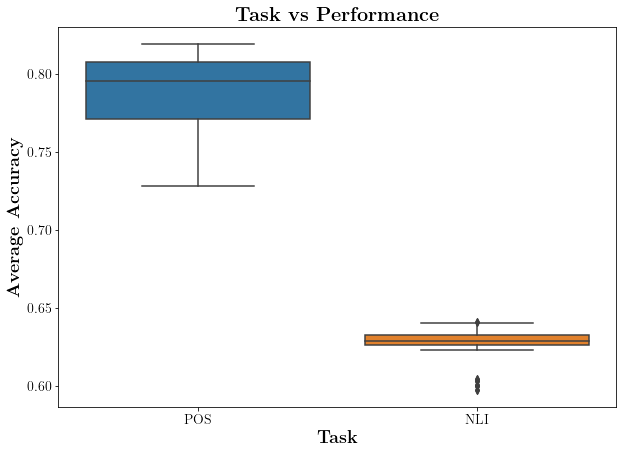

In [9]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="task", y="final_eval_avg_accuracy", hue=None)

plt.xlabel(r"\textbf{Task}", fontsize=18)
plt.ylabel(r"\textbf{Average Accuracy}", fontsize=18)

plt.title(r"\textbf{Task vs Performance}", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
plt.show()


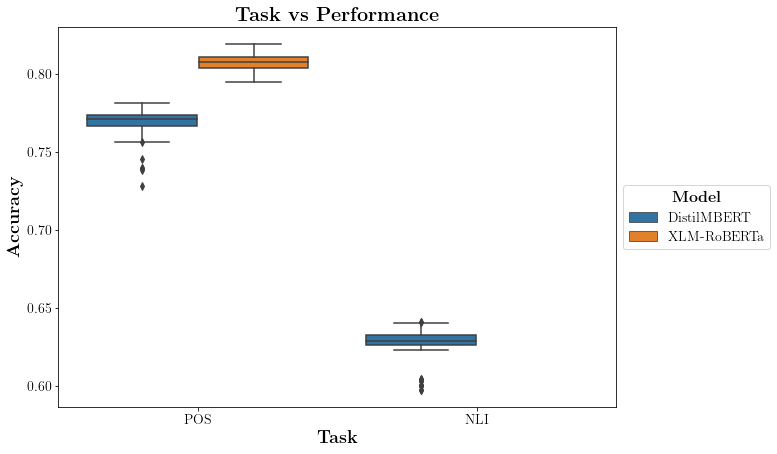

In [10]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="task", y="final_eval_avg_accuracy", hue="model")

plt.xlabel(r"\textbf{Task}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Task vs Performance}", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(
    title=r"\textbf{Model}",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    title_fontsize=16,
    prop={"size": 14},
)

# plt.ylim(0, 1)
plt.show()


## Models

In [11]:
df = results.copy()
# I will use only POS for the moment since we don't have NLI results for XLM
df = df[df["task"] == "POS"]
# The results are almost the same with and without QE filtering
df = df[df['threshold'] == 0.0]

In [12]:
# stats = df.groupby('model').agg(
#     accuracy=('final_eval_avg_accuracy', 'mean'),
#     error=('final_eval_avg_accuracy', 'std')
# )
# stats

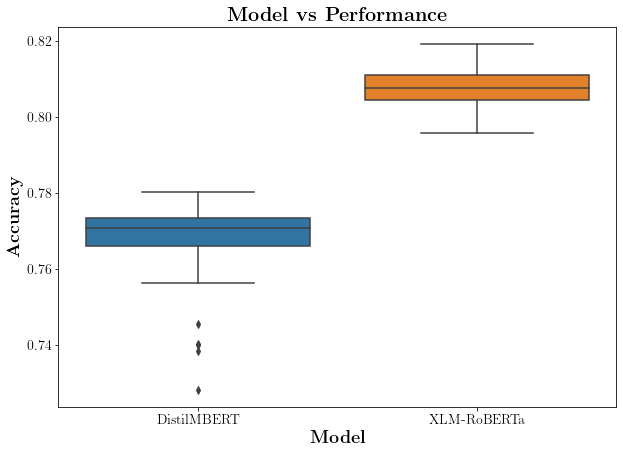

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="model", y="final_eval_avg_accuracy", hue=None)

plt.xlabel(r"\textbf{Model}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Model vs Performance}", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
plt.show()


## Methods

In [14]:
df = results.copy()
# I will use only POS for the moment since we don't have NLI results for XLM
df = df[df["task"] == "POS"]
# The results are almost the same with and without QE filtering
df = df[df['threshold'] == 0.0]

In [15]:
# stats = df.groupby('method').agg(
#     accuracy=('final_eval_avg_accuracy', 'mean'),
#     error=('final_eval_avg_accuracy', 'std')
# )
# stats

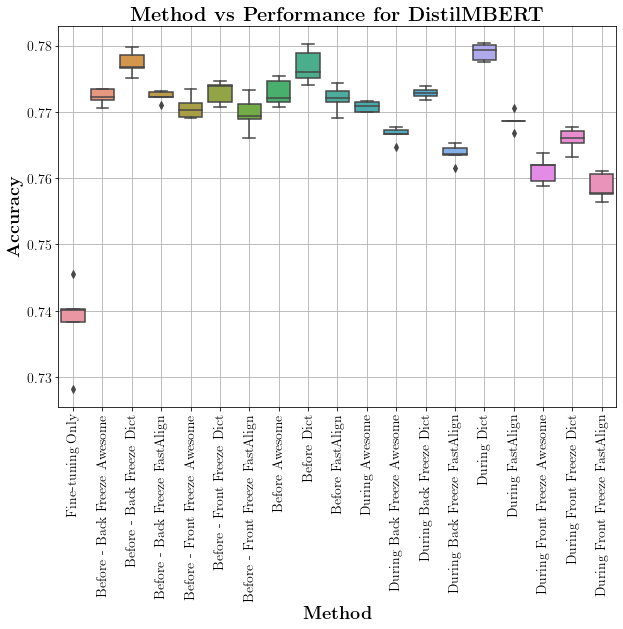

In [16]:
order = [
    "Fine-tuning Only",
    "Before - Back Freeze Awesome",
    "Before - Back Freeze Dict",
    "Before - Back Freeze FastAlign",
    "Before - Front Freeze Awesome",
    "Before - Front Freeze Dict",
    "Before - Front Freeze FastAlign",
    "Before Awesome",
    "Before Dict",
    "Before FastAlign",
    "During Awesome",
    "During Back Freeze Awesome",
    "During Back Freeze Dict",
    "During Back Freeze FastAlign",
    "During Dict",
    "During FastAlign",
    "During Front Freeze Awesome",
    "During Front Freeze Dict",
    "During Front Freeze FastAlign",
]

plt.figure(figsize=(10, 7))
ax = sns.boxplot(
    data=df[df["model"] == "DistilMBERT"],
    x="method",
    y="final_eval_avg_accuracy",
    order=order,
    hue=None,
)

plt.xlabel(r"\textbf{Method}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Method vs Performance for DistilMBERT}", fontsize=20)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

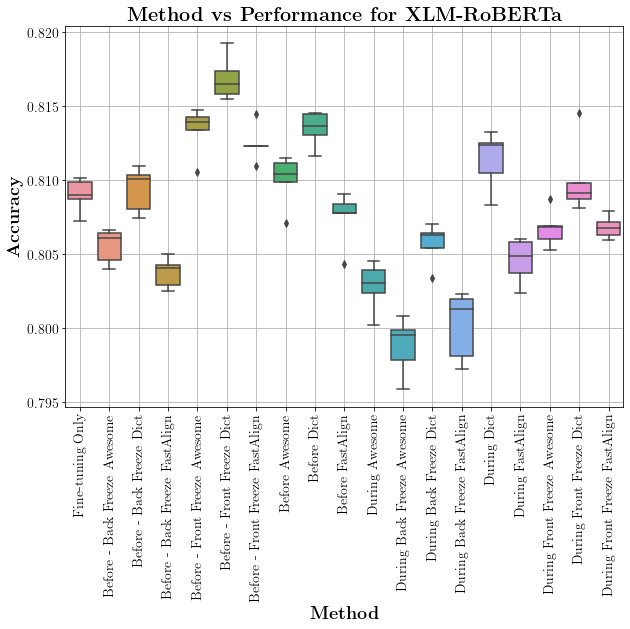

In [17]:
order = [
    "Fine-tuning Only",
    "Before - Back Freeze Awesome",
    "Before - Back Freeze Dict",
    "Before - Back Freeze FastAlign",
    "Before - Front Freeze Awesome",
    "Before - Front Freeze Dict",
    "Before - Front Freeze FastAlign",
    "Before Awesome",
    "Before Dict",
    "Before FastAlign",
    "During Awesome",
    "During Back Freeze Awesome",
    "During Back Freeze Dict",
    "During Back Freeze FastAlign",
    "During Dict",
    "During FastAlign",
    "During Front Freeze Awesome",
    "During Front Freeze Dict",
    "During Front Freeze FastAlign",
]

plt.figure(figsize=(10, 7))
ax = sns.boxplot(
    data=df[df["model"] == "XLM-RoBERTa"],
    x="method",
    y="final_eval_avg_accuracy",
    order=order,
    hue=None,
)

plt.xlabel(r"\textbf{Method}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Method vs Performance for XLM-RoBERTa}", fontsize=20)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

In [18]:
# order = [
#     "Fine-tuning Only",
#     "Before - Back Freeze Awesome",
#     "Before - Back Freeze Dict",
#     "Before - Back Freeze FastAlign",
#     "Before - Front Freeze Awesome",
#     "Before - Front Freeze Dict",
#     "Before - Front Freeze FastAlign",
#     "Before Awesome",
#     "Before Dict",
#     "Before FastAlign",
#     "During Awesome",
#     "During Back Freeze Awesome",
#     "During Back Freeze Dict",
#     "During Back Freeze FastAlign",
#     "During Dict",
#     "During FastAlign",
#     "During Front Freeze Awesome",
#     "During Front Freeze Dict",
#     "During Front Freeze FastAlign",
# ]

# plt.figure(figsize=(10, 7))
# ax = sns.boxplot(data=df, x="method", y="final_eval_avg_accuracy", order=order, hue="model")

# plt.xlabel(r"\textbf{Method}", fontsize=18)
# plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

# plt.title(r"\textbf{Method vs Performance}", fontsize=20)

# plt.xticks(fontsize=14, rotation=90)
# plt.yticks(fontsize=14)

# plt.legend(
#     title=r"\textbf{Model}",
#     loc="center left",
#     bbox_to_anchor=(1, 0.5),
#     title_fontsize=16,
#     prop={"size": 14},
# )

# # plt.ylim(0, 1)
# ax.set_axisbelow(True)
# plt.grid()

# plt.show()

## QE filtering

In [19]:
df = results.copy()
# I will use only POS for the moment since we don't have NLI results for XLM and only two experiments for that with DistilMBERT
df = df[df["task"] == "POS"]
# The results are almost the same with and without QE filtering
df = df[df['threshold'] == 0.0]

In [20]:
# stats = df.groupby('threshold').agg(
#     accuracy=('final_eval_avg_accuracy', 'mean'),
#     error=('final_eval_avg_accuracy', 'std')
# )
# stats

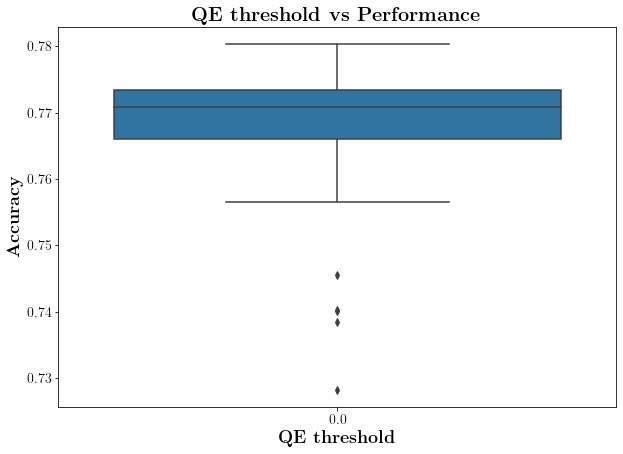

In [21]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df[df["model"] == "DistilMBERT"],
    x="threshold",
    y="final_eval_avg_accuracy",
    order=None,
    hue=None,
)

plt.xlabel(r"\textbf{QE threshold}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{QE threshold vs Performance}", fontsize=20)

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
plt.show()

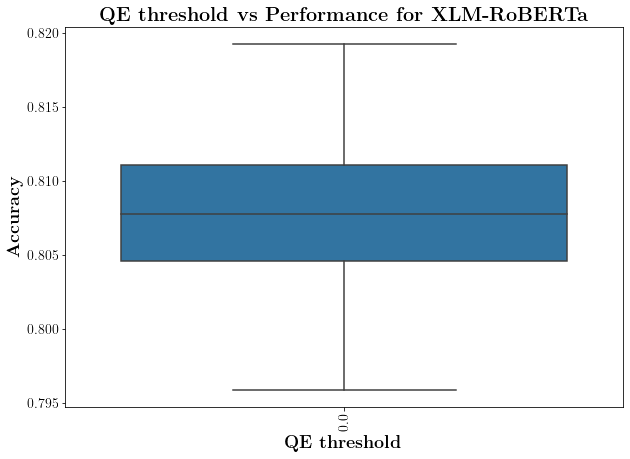

In [22]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df[df["model"] == "XLM-RoBERTa"],
    x="threshold",
    y="final_eval_avg_accuracy",
    order=None,
    hue=None,
)

plt.xlabel(r"\textbf{QE threshold}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{QE threshold vs Performance for XLM-RoBERTa}", fontsize=20)

plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
plt.show()

## Languages

In [35]:
lang_family = {
    'af': 'Germanic',
    'ar': 'Afro-Asiatic',
    'bg': 'Indo-European',
    'ca': 'Indo-European',
    'cs': 'Indo-European',
    'da': 'Indo-European',
    'de': 'Indo-European',
    'el': 'Indo-European',
    'es': 'Indo-European',
    'fa': 'Indo-European',
    'fi': 'Uralic',
    'fr': 'Indo-European',
    'he': 'Afro-Asiatic',
    'hi': 'Indo-European',
    'hu': 'Uralic',
    'it': 'Indo-European',
    'ja': 'Japonic',
    'ko': 'Koreanic',
    'lt': 'Indo-European',
    'lv': 'Indo-European',
    'no': 'Indo-European',
    'pl': 'Indo-European',
    'pt': 'Indo-European',
    'ro': 'Indo-European',
    'ru': 'Indo-European',
    'sk': 'Indo-European',
    'sl': 'Indo-European',
    'sv': 'Indo-European',
    'ta': 'Dravidian',
    'th': 'Kra-Dai',
    'tr': 'Turkic',
    'uk': 'Indo-European',
    'vi': 'Austroasiatic',
    'zh': 'Sino-Tibetan'
}

writing_systems = {
    'af': 'Latin',
    'ar': 'Arabic',
    'bg': 'Cyrillic',
    'ca': 'Latin',
    'cs': 'Latin',
    'da': 'Latin',
    'de': 'Latin',
    'el': 'Greek',
    'es': 'Latin',
    'fa': 'Persian',
    'fi': 'Latin',
    'fr': 'Latin',
    'he': 'Hebrew',
    'hi': 'Devanagari',
    'hu': 'Latin',
    'it': 'Latin',
    'ja': 'Kana', # Kanji, Hiragana, Katakana,
    'ko': 'Hangul',
    'lt': 'Latin',
    'lv': 'Latin',
    'no': 'Latin',
    'pl': 'Latin',
    'pt': 'Latin',
    'ro': 'Latin',
    'ru': 'Cyrillic',
    'sk': 'Latin',
    'sl': 'Latin',
    'sv': 'Latin',
    'ta': 'Tamil',
    'th': 'Thai',
    'tr': 'Latin',
    'uk': 'Cyrillic',
    'vi': 'Latin',
    'zh': 'Hanzi'
}

latin_or_not = {
    'af': 'Latin',
    'ar': 'Non-Latin',
    'bg': 'Non-Latin',
    'ca': 'Latin',
    'cs': 'Latin',
    'da': 'Latin',
    'de': 'Latin',
    'el': 'Non-Latin',
    'es': 'Latin',
    'fa': 'Non-Latin',
    'fi': 'Latin',
    'fr': 'Latin',
    'he': 'Non-Latin',
    'hi': 'Non-Latin',
    'hu': 'Latin',
    'it': 'Latin',
    'ja': 'Non-Latin',
    'ko': 'Non-Latin',
    'lt': 'Latin',
    'lv': 'Latin',
    'no': 'Latin',
    'pl': 'Latin',
    'pt': 'Latin',
    'ro': 'Latin',
    'ru': 'Non-Latin',
    'sk': 'Latin',
    'sl': 'Latin',
    'sv': 'Latin',
    'ta': 'Non-Latin',
    'th': 'Non-Latin',
    'tr': 'Latin',
    'uk': 'Non-Latin',
    'vi': 'Latin',
    'zh': 'Non-Latin'
}


In [36]:
accuracy_cols = [col for col in results.columns if 'final_eval_' in col and 'accuracy' in col]
df_langs = pd.DataFrame()

for col in accuracy_cols:
    # Extract language code from column name
    lang = col.split('_')[2]  # This assumes the format is 'final_eval_xx_accuracy'
    
    # Copy relevant data and add new columns
    temp_df = results[['seed', 'model', 'task', 'method', 'threshold']].copy()
    temp_df['lang'] = lang
    temp_df['final_eval_avg_accuracy'] = results[col]
    
    # Append to the new DataFrame
    df_langs = pd.concat([df_langs, temp_df], ignore_index=True)

df_langs = df_langs.sort_values(by="lang")
df_langs = df_langs[~df_langs['lang'].isin(["avg", "same"])]
# I will use only POS for the moment since we don't have NLI results for XLM and only two experiments for that with DistilMBERT
df_langs = df_langs[df_langs["task"] == "POS"].dropna()
# Add language family
df_langs['lang_family'] = df_langs['lang'].map(lang_family)
# Add writing system
df_langs['lang_writing_system'] = df_langs['lang'].map(writing_systems)
# Add latin or not
df_langs['latin_or_not'] = df_langs['lang'].map(latin_or_not)
# The results are almost the same with and without QE filtering
df = df[df['threshold'] == 0.0]
df_langs

,seed,model,task,method,threshold,lang,final_eval_avg_accuracy,lang_family,lang_writing_system,latin_or_not
5975,31,DistilMBERT,POS,Before FastAlign,0.0,af,0.861202,Germanic,Latin,Latin
6775,31,XLM-RoBERTa,POS,During Front Freeze FastAlign,0.4,af,0.878987,Germanic,Latin,Latin
6774,17,XLM-RoBERTa,POS,Before - Back Freeze Dict,0.4,af,0.884650,Germanic,Latin,Latin
6773,23,XLM-RoBERTa,POS,Before - Back Freeze Dict,0.4,af,0.882861,Germanic,Latin,Latin
6772,66,XLM-RoBERTa,POS,Before - Back Freeze Dict,0.4,af,0.887928,Germanic,Latin,Latin
...,...,...,...,...,...,...,...,...,...,...
40234,17,XLM-RoBERTa,POS,Before - Back Freeze Dict,0.4,zh,0.723633,Sino-Tibetan,Hanzi,Non-Latin
40235,31,XLM-RoBERTa,POS,During Front Freeze FastAlign,0.4,zh,0.714892,Sino-Tibetan,Hanzi,Non-Latin
40236,42,XLM-RoBERTa,POS,During Front Freeze FastAlign,0.4,zh,0.702239,Sino-Tibetan,Hanzi,Non-Latin
40238,23,XLM-RoBERTa,POS,During Front Freeze FastAlign,0.4,zh,0.699825,Sino-Tibetan,Hanzi,Non-Latin


In [37]:
# stats = df_langs.groupby('lang').agg(
#     accuracy=('final_eval_avg_accuracy', 'mean'),
#     error=('final_eval_avg_accuracy', 'std')
# )
# stats

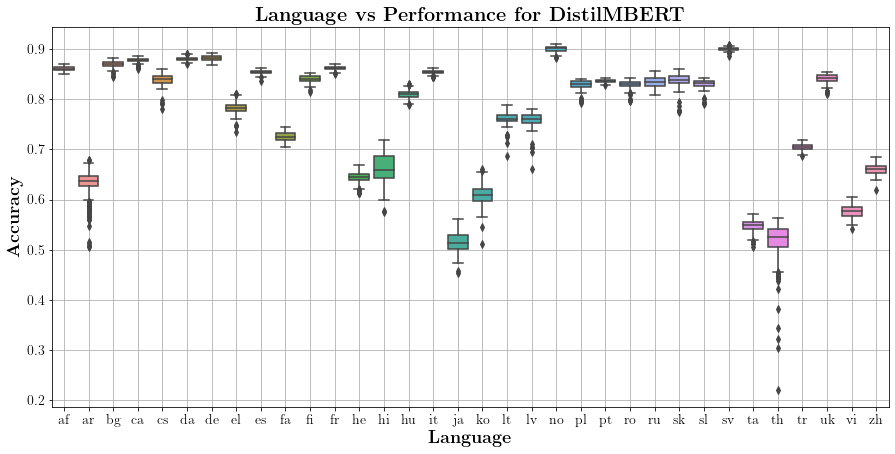

In [38]:
plt.figure(figsize=(15, 7))

ax = sns.boxplot(
    data=df_langs[df_langs["model"] == "DistilMBERT"].dropna(),
    x="lang",
    y="final_eval_avg_accuracy",
    order=None,
    hue=None,
)

plt.xlabel(r"\textbf{Language}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Language vs Performance for DistilMBERT}", fontsize=20)

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

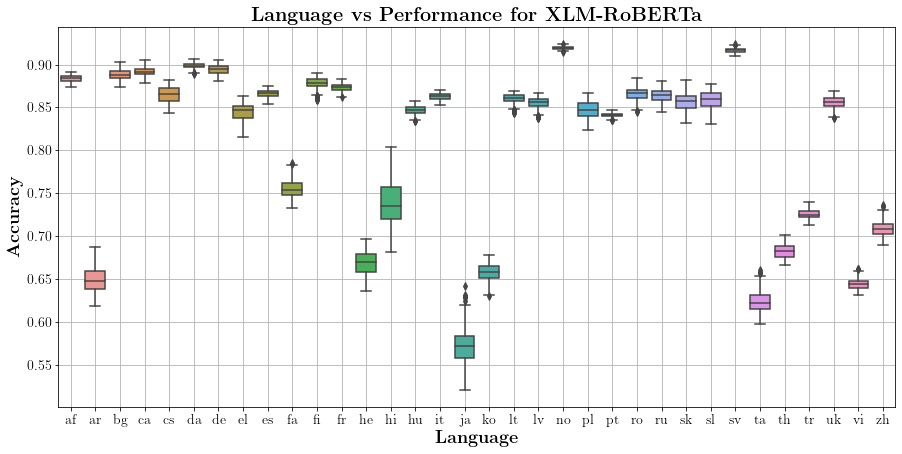

In [39]:
plt.figure(figsize=(15, 7))

ax = sns.boxplot(
    data=df_langs[df_langs["model"] == "XLM-RoBERTa"].dropna(),
    x="lang",
    y="final_eval_avg_accuracy",
    order=None,
    hue=None,
)

plt.xlabel(r"\textbf{Language}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Language vs Performance for XLM-RoBERTa}", fontsize=20)

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

In [28]:
# plt.figure(figsize=(15, 7))

# ax = sns.boxplot(
#     data=df_langs.dropna(),
#     x="lang",
#     y="final_eval_avg_accuracy",
#     order=None,
#     hue="model",
# )

# plt.xlabel(r"\textbf{Language}", fontsize=18)
# plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

# plt.title(r"\textbf{Language vs Performance}", fontsize=20)

# plt.xticks(fontsize=14, rotation=90)
# plt.yticks(fontsize=14)

# # plt.ylim(0, 1)
# ax.set_axisbelow(True)
# plt.grid(linewidth=1.5, zorder=0)

# plt.legend(
#     title=r"\textbf{Model}",
#     loc="center left",
#     bbox_to_anchor=(1, 0.5),
#     title_fontsize=16,
#     prop={"size": 14},
# )

# plt.show()

### Group families

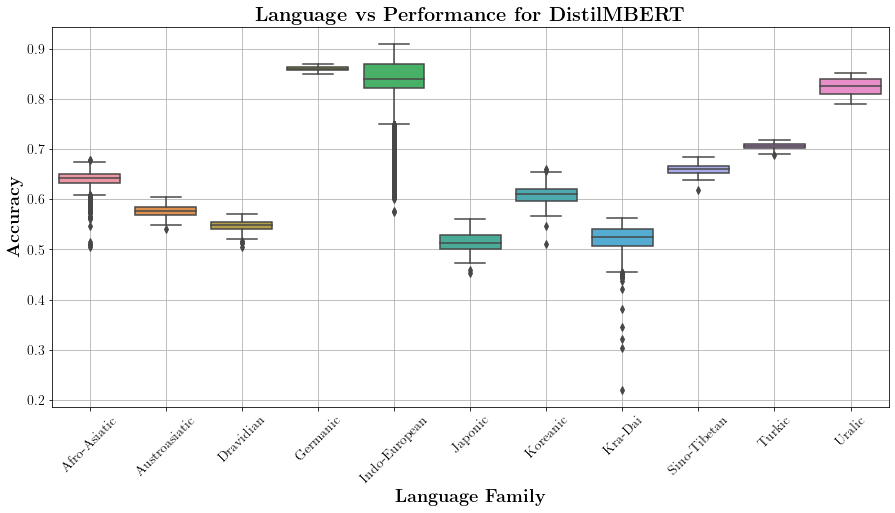

In [29]:
plt.figure(figsize=(15, 7))

ax = sns.boxplot(
    data=df_langs[df_langs["model"] == "DistilMBERT"].sort_values("lang_family"),
    x="lang_family",
    y="final_eval_avg_accuracy",
    order=None,
    hue=None,
)

plt.xlabel(r"\textbf{Language Family}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Language vs Performance for DistilMBERT}", fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

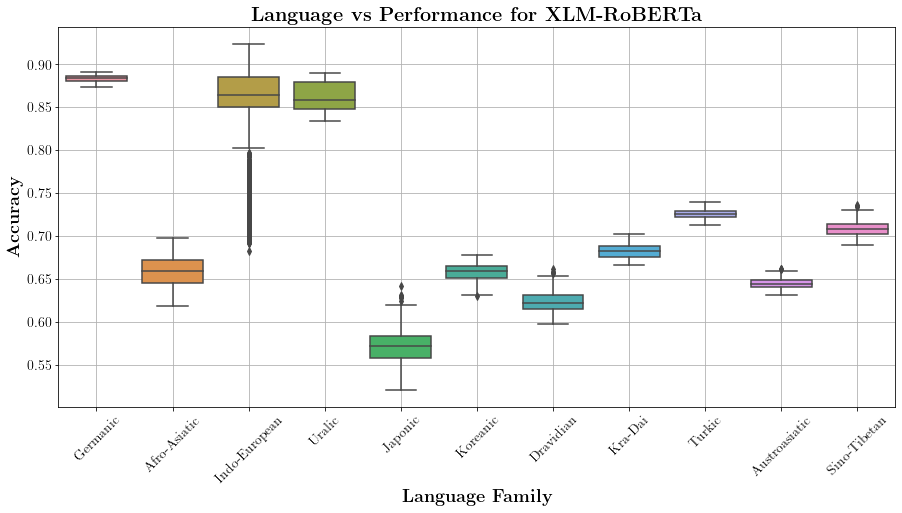

In [30]:
plt.figure(figsize=(15, 7))

ax = sns.boxplot(
    data=df_langs[df_langs["model"] == "XLM-RoBERTa"].dropna(),
    x="lang_family",
    y="final_eval_avg_accuracy",
    order=None,
    hue=None,
)

plt.xlabel(r"\textbf{Language Family}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Language vs Performance for XLM-RoBERTa}", fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

### Writing system

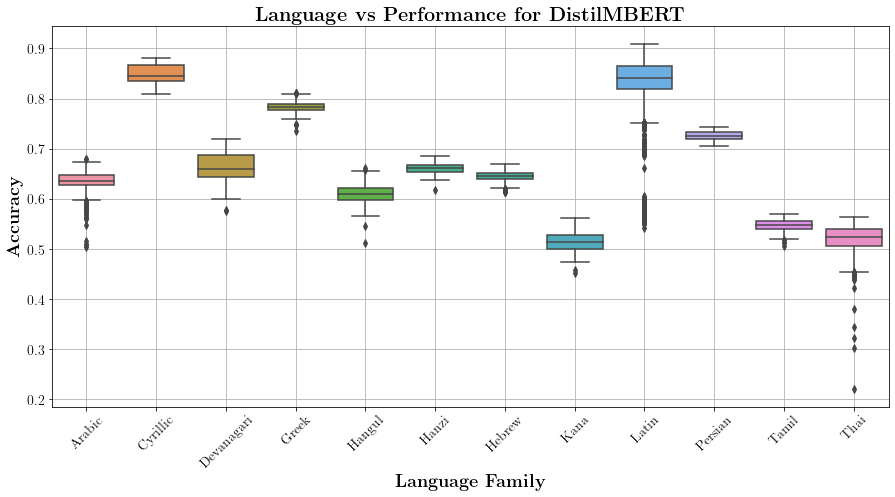

In [31]:
plt.figure(figsize=(15, 7))

ax = sns.boxplot(
    data=df_langs[df_langs["model"] == "DistilMBERT"].sort_values("lang_writing_system"),
    x="lang_writing_system",
    y="final_eval_avg_accuracy",
    order=None,
    hue=None,
)

plt.xlabel(r"\textbf{Language Family}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Language vs Performance for DistilMBERT}", fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

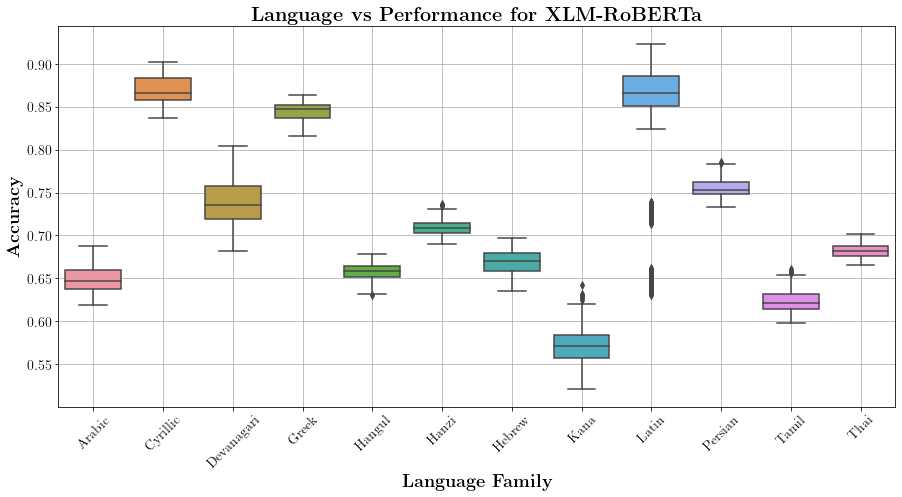

In [32]:
plt.figure(figsize=(15, 7))

ax = sns.boxplot(
    data=df_langs[df_langs["model"] == "XLM-RoBERTa"].sort_values("lang_writing_system"),
    x="lang_writing_system",
    y="final_eval_avg_accuracy",
    order=None,
    hue=None,
)

plt.xlabel(r"\textbf{Language Family}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Language vs Performance for XLM-RoBERTa}", fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

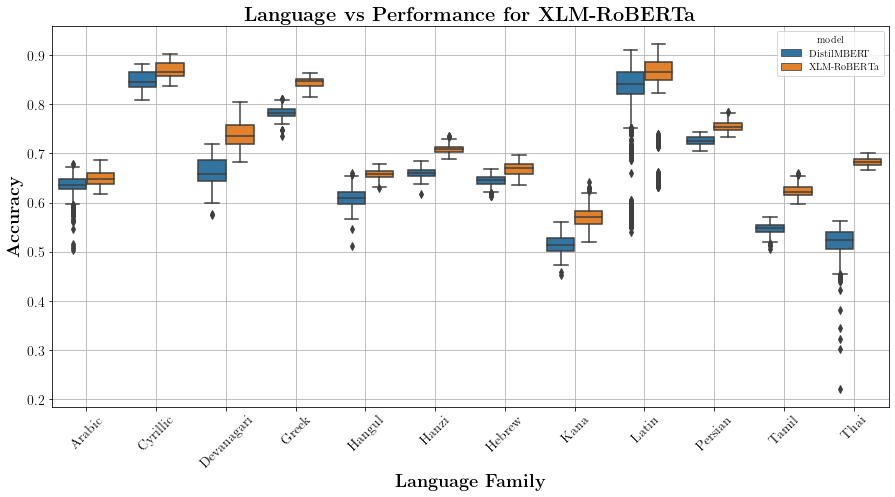

In [33]:
plt.figure(figsize=(15, 7))

ax = sns.boxplot(
    data=df_langs.sort_values("lang_writing_system"),
    x="lang_writing_system",
    y="final_eval_avg_accuracy",
    order=None,
    hue="model",
)

plt.xlabel(r"\textbf{Language Family}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Language vs Performance for XLM-RoBERTa}", fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()

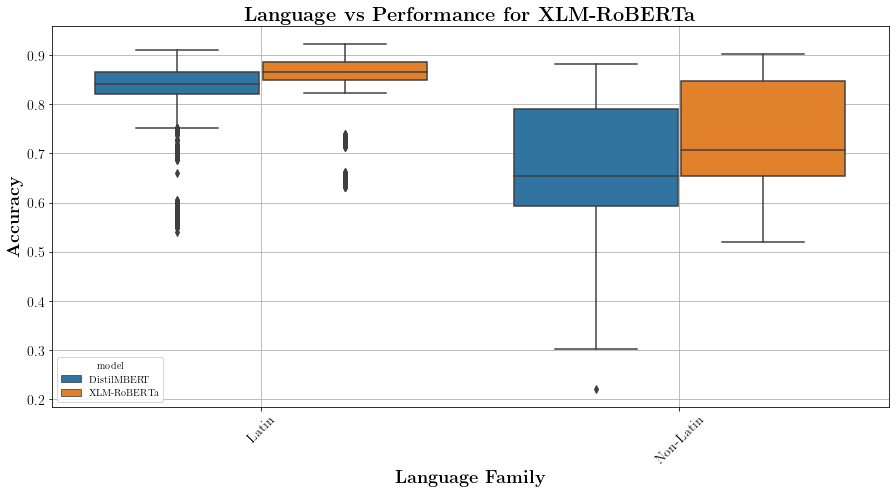

In [34]:
plt.figure(figsize=(15, 7))

ax = sns.boxplot(
    data=df_langs.sort_values("latin_or_not"),
    x="latin_or_not",
    y="final_eval_avg_accuracy",
    order=None,
    hue="model",
)

plt.xlabel(r"\textbf{Language Family}", fontsize=18)
plt.ylabel(r"\textbf{Accuracy}", fontsize=18)

plt.title(r"\textbf{Language vs Performance for XLM-RoBERTa}", fontsize=20)

plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# plt.ylim(0, 1)
ax.set_axisbelow(True)
plt.grid()

plt.show()